In [2]:
import numpy as np
from spec_id import Analyze_LH_lwa, Median_w_Error_cont
import matplotlib.pyplot as plt
import fsps
from scipy.interpolate import interp1d
from matplotlib import gridspec
from matplotlib import colorbar
from matplotlib import gridspec
from matplotlib import colors
import matplotlib as mpl
import pandas as pd
import os
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [15]:
# galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
AGE=np.arange(.15,6.05,.05)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [26]:
g_grid = np.zeros([metal.size,AGE.size,len(tau)])
for i in range(metal.size):
    g_grid[i]=np.load('../data/m%s_rbf.npy' % metal[i]).T

    
age_conv = np.load('../data/light_weight_scaling_3.npy')

In [4]:
age = np.arange(.15,6.05,.05)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

rband_flux = np.zeros([len(tau),len(age)])
for i in range(len(tau)):
    if tau[i]==0:
        sp = fsps.StellarPopulation(imf_type=0,tpagb_norm_type=0,zcontinuous=1,logzsol=np.log10(0.019/0.019), sfh=0)
    else:
        ultau=np.round(np.power(10,np.array(tau[i])-9),2)
        sp = fsps.StellarPopulation(imf_type=0,tpagb_norm_type=0,zcontinuous=1,logzsol=np.log10(0.019/0.019), sfh=1,tau=ultau)
    for ii in range(len(age)):
        rband=sp.get_mags(tage=age[ii],bands=['sdss_g'])[0]
        rband_flux[i][ii]= 10**(-rband/2.5)

fn = '../data/m0.019_gtau'
np.save(fn, rband_flux)
        

In [19]:
AGE.shape

(118,)

In [22]:
L = g_grid[17].T

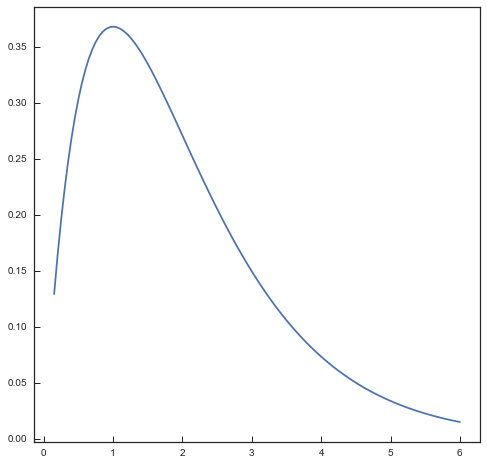

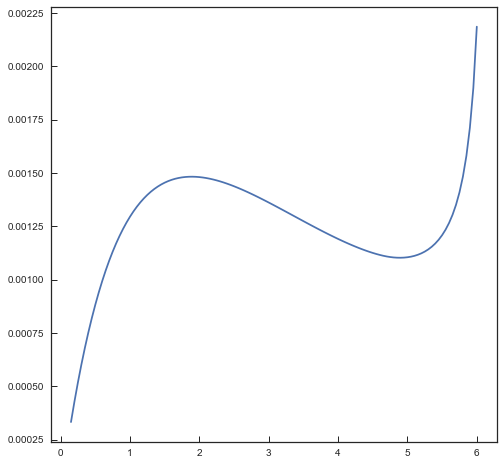

In [32]:
# plt.figure(figsize=[8,8])
# plt.plot(AGE,L[3][::-1])

plt.figure(figsize=[8,8])
plt.plot(AGE,SFH(AGE,ultau[10]))

plt.figure(figsize=[8,8])
plt.plot(AGE,SFH(AGE,ultau[10])*L[10][::-1])

In [101]:
l_dist2= age_conv2[17].T

In [9]:
ultau=np.append(0.0001,10**(np.array(tau[1:])-9))

In [11]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

In [7]:
def LWA(dist,tau):
    top = np.zeros(len(dist))
    bottom = np.zeros(len(dist))

    for i in range(len(dist)):
        top[i] = np.trapz(SFH(AGE,tau)[0:i+1] * dist[0:i+1] * (AGE[i] - AGE[0:i+1]),AGE[0:i+1])
        bottom[i] = np.trapz(SFH(AGE,tau)[0:i+1]*dist[0:i+1],AGE[0:i+1])
    
    return top/bottom

def LWA2(dist,tau):
    dst = np.append(2*dist[0]-dist[1],dist)
    
    iage = np.arange(0,6.01,.01)

    hiressfh=SFH(iage,tau)
    idst = interp1d(np.append(0,AGE),dst)(iage)
    
    top = np.zeros(len(idst)-1)
    bottom = np.zeros(len(idst)-1)
    
    for i in range(len(idst)-1):
        top[i] = np.trapz(hiressfh[0:i+1] * idst[0:i+1] * (iage[i+1] - iage[0:i+1]),iage[0:i+1])
        bottom[i] = np.trapz(hiressfh[0:i+1] * idst[0:i+1],iage[0:i+1])
    
    lwa = interp1d(np.arange(0.01,6.01,.01),top/bottom)(age)
    
    return lwa

In [5]:
tdist = rband_flux

In [22]:
tdist.shape

(31, 118)

In [27]:
g_grid.shape

(29, 118, 31)

In [35]:
def LWA_T(dist,tau):    
    dst = np.append(2*dist[0]-dist[1],dist)
    
    iage = np.arange(0,6.01,.01)
    
    hiressfh=SFH(iage,tau)
    
    idst = interp1d(np.append(0,AGE),dst)(iage)
    
    top = np.zeros(len(idst)-1)
    bottom = np.zeros(len(idst)-1)
    
    for i in range(len(idst)-1):
        top[i] = np.trapz(hiressfh[0:i+1] * idst[0:i+1] * (iage[i+1] - iage[0:i+1]),iage[0:i+1])
        bottom[i] = np.trapz(hiressfh[0:i+1] * idst[0:i+1],iage[0:i+1])
    
    lwa = interp1d(np.arange(0.01,6.01,.01),top/bottom)(age)
    
    return lwa

In [31]:
test = LWA_T(tdist[1][::-1],ultau[1])

(119,)
(119,)


/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


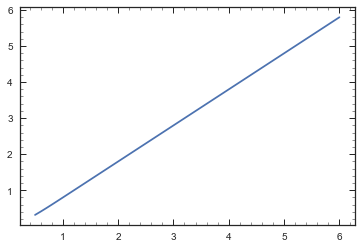

In [33]:
%matplotlib inline
plt.plot(age,test)

In [40]:

lwa = []
for i in range(len(ultau)):
    lwa.append(LWA_T(tdist[i][::-1],ultau[i]))  

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in divide


In [41]:
np.save('../data/light_weight_scaling_t.npy',lwa)

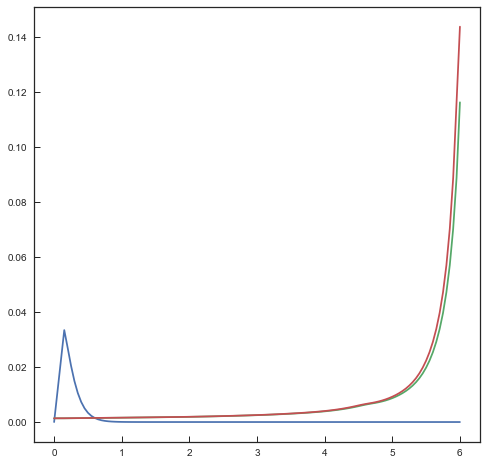

In [63]:
%matplotlib inline

dst1=np.append(g_grid[17].T[1],g_grid[17].T[1][-1])[::-1]
dst2=np.append(2*g_grid[17].T[1][0]-g_grid[17].T[1][1],g_grid[17].T[1])[::-1]

plt.figure(figsize=[8,8])
plt.plot(np.append(0,AGE),SFH(np.append(0,AGE),ultau[1]))
plt.plot(np.append(0,AGE),dst1)
plt.plot(np.append(0,AGE),dst2)

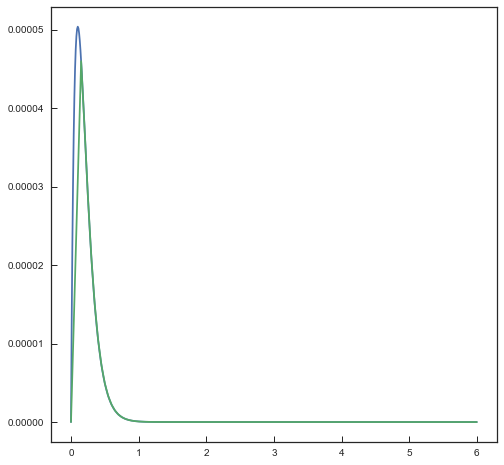

In [65]:
%matplotlib inline

iage = np.arange(0,6.01,.01)

hiressfh=SFH(iage,ultau[1])
dst=np.append(2*g_grid[17].T[1][0]-g_grid[17].T[1][1],g_grid[17].T[1])[::-1]
idst = interp1d(np.append(0,AGE),dst)(iage)

plt.figure(figsize=[8,8])
plt.plot(iage,hiressfh*idst)
plt.plot(np.append(0,AGE),SFH(np.append(0,AGE),ultau[1])*dst2)

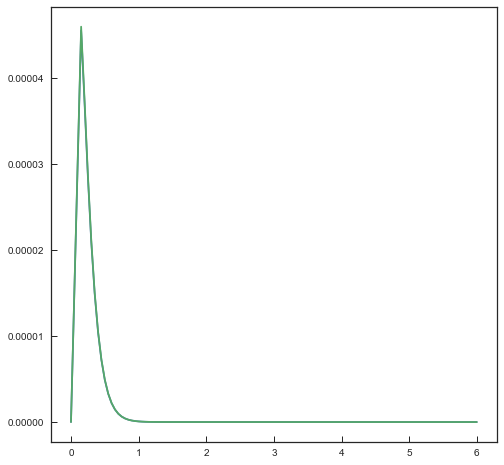

In [64]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(np.append(0,AGE),SFH(np.append(0,AGE),ultau[1])*dst1)
plt.plot(np.append(0,AGE),SFH(np.append(0,AGE),ultau[1])*dst2)

In [89]:
test = LWA(g_grid[17].T[2][::-1],ultau[2])
test2 = LWA2(g_grid[17].T[2][::-1],ultau[2])

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


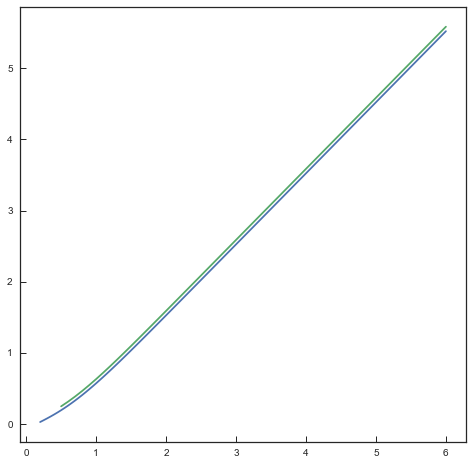

In [90]:
plt.figure(figsize=[8,8])
plt.plot(AGE,test)
plt.plot(age,test2)

<function matplotlib.pyplot.close>

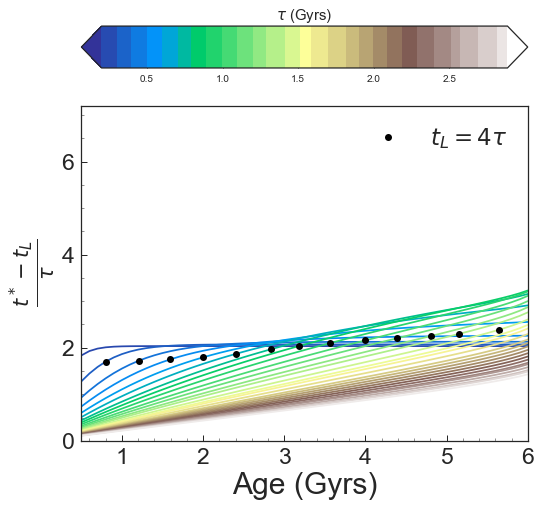

In [10]:
%matplotlib inline

col_list = sea.mpl_palette('terrain',ultau[1:].size)

gs =gridspec.GridSpec(2,1,height_ratios=[1,8])
plt.figure(figsize=[8,8])
ax = plt.subplot(gs[0])
cmap = mpl.cm.get_cmap('terrain')

bounds =ultau[1:]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                extend='both',
                                ticks=[.1,.5,1.0,1.5,2.0,2.5,3.0],
                                spacing='proportional',
                                orientation='horizontal')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('$\\tau$ (Gyrs)',fontsize=15)

plt.subplot(gs[1])
for i in range(len(l_dist)-1):
    plt.plot(age,(age - l_dist[i+1])/ultau[i+1],color=col_list[i])
    
    if .5 <= ultau[i+1]*4 <= 6: 
        plt.plot(ultau[i+1]*4,interp1d(age,(age - l_dist[i+1])/ultau[i+1])(ultau[i+1]*4),'ko')
plt.plot(0,0,'ko',label = '$t_L = 4\\tau$')
plt.legend(loc=1,fontsize=23)
plt.axis([.5,6,0,7.2])
plt.xlabel('Age (Gyrs)',fontsize=30)
plt.ylabel('$\\frac{t^* - t_L}{\\tau}$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
# plt.savefig('../plots/tau_limit.pdf',bbox_inches = 'tight')
plt.close

In [8]:
l_dist= age_conv[17].T

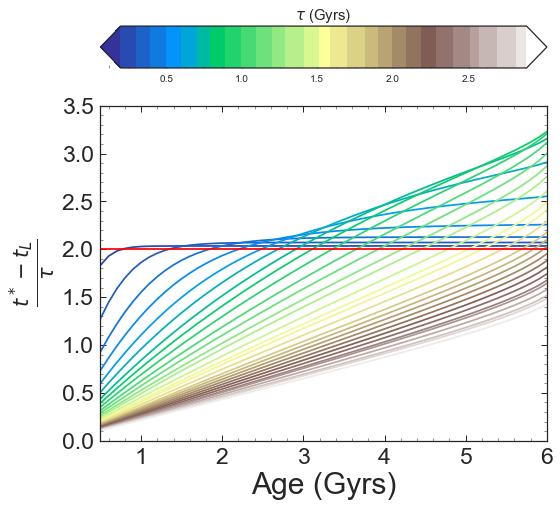

In [14]:
%matplotlib inline

col_list = sea.mpl_palette('terrain',ultau[1:].size)

gs =gridspec.GridSpec(2,1,height_ratios=[1,8])
plt.figure(figsize=[8,8])
ax = plt.subplot(gs[0])
cmap = mpl.cm.get_cmap('terrain')

bounds =ultau[1:]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                extend='both',
                                ticks=[.1,.5,1.0,1.5,2.0,2.5,3.0],
                                spacing='proportional',
                                orientation='horizontal')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('$\\tau$ (Gyrs)',fontsize=15)

plt.subplot(gs[1])
for i in range(len(l_dist)-1):
    plt.plot(age,(age - l_dist[i+1])/ultau[i+1],color=col_list[i])
    
#     if .5 <= ultau[i+1]*4 <= 6: 
#         plt.plot(ultau[i+1]*4,interp1d(age,(age - l_dist[i+1])/ultau[i+1])(ultau[i+1]*4),'ko')
# plt.plot(0,0,'ko',label = '$t_L = 4\\tau$')
plt.axhline(2,color='r')
plt.legend(loc=1,fontsize=23)
plt.axis([.5,6,0,3.5])
plt.xlabel('Age (Gyrs)',fontsize=30)
plt.ylabel('$\\frac{t^* - t_L}{\\tau}$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
# plt.savefig('../plots/tau_limit.pdf',bbox_inches = 'tight')
# plt.close

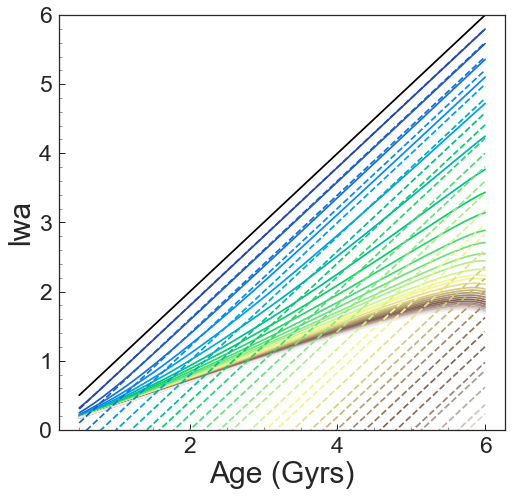

In [13]:
%matplotlib inline

plt.figure(figsize=[8,8])

plt.plot(age,age,color='k')

for i in range(len(l_dist)-1):
    plt.plot(age,l_dist[i+1],color=col_list[i])
    
for i in range(len(l_dist)-1):
    plt.plot(age,age - 2 * ultau[i+1],'--',color=col_list[i])
    
plt.legend(loc=1,fontsize=23)
# plt.axis([.5,6,0,7.2])
plt.xlabel('Age (Gyrs)',fontsize=30)
plt.ylabel('lwa',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.ylim(0,6)
plt.gcf().subplots_adjust(bottom=0.16)

In [14]:
ultau[1:]

array([ 0.1       ,  0.19952623,  0.30199517,  0.39810717,  0.50118723,
        0.60255959,  0.70794578,  0.79432823,  0.89125094,  1.        ,
        1.0964782 ,  1.20226443,  1.28824955,  1.41253754,  1.51356125,
        1.58489319,  1.69824365,  1.81970086,  1.90546072,  1.99526231,
        2.08929613,  2.18776162,  2.29086765,  2.39883292,  2.51188643,
        2.57039578,  2.6915348 ,  2.81838293,  2.8840315 ,  3.01995172])

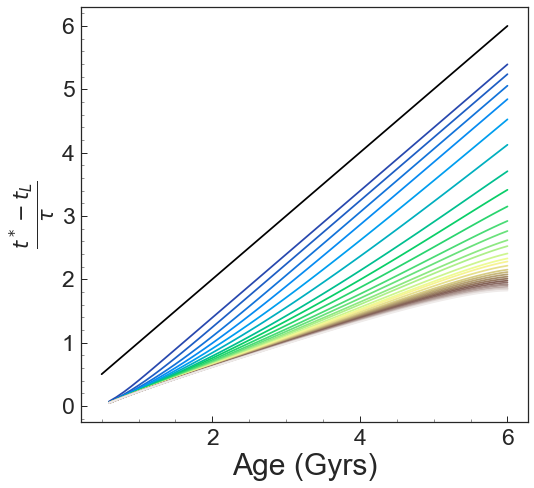

In [102]:
%matplotlib inline

plt.figure(figsize=[8,8])

plt.plot(age,age,color='k')

for i in range(len(l_dist2)-1):
    plt.plot(age,l_dist2[i+1],color=col_list[i])
plt.legend(loc=1,fontsize=23)
# plt.axis([.5,6,0,7.2])
plt.xlabel('Age (Gyrs)',fontsize=30)
plt.ylabel('$\\frac{t^* - t_L}{\\tau}$',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)

In [11]:
age_conv=np.zeros([metal.size,age.size,len(tau)])

for i in range(metal.size):
    for ii in range(len(tau)):
        age_conv[i].T[ii] = LWA2(g_grid[i].T[ii][::-1],ultau[ii])

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [12]:
np.save('../data/light_weight_scaling_r.npy',age_conv)

In [14]:
rband_age = np.load('../data/light_weight_scaling_r.npy')

In [16]:
print rband_age[17][20][3]
print age_conv[17][20][3]

1.87195214178
1.86757922067


In [20]:
r_ages = []
for i in galDB.index:
    P2,PZ2,Pt2 =  Analyze_LH_lwa('../chidat/{0}_dtau_chidata.npy'.format(galDB['gids'][i]),galDB['hi_res_specz'][i],
                          metal,age,tau,age_conv='../data/light_weight_scaling_r.npy')
    med,mler,mher = Median_w_Error_cont(Pt2,age)
    r_ages.append(med)

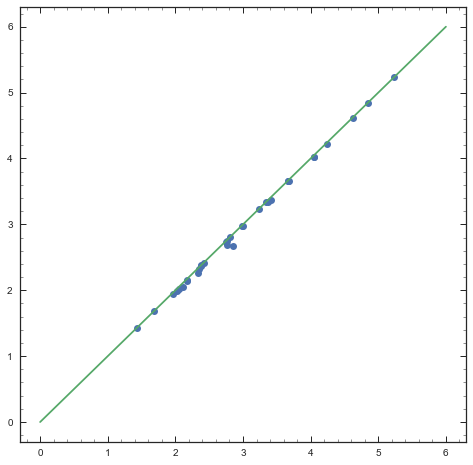

In [23]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(r_ages,galDB.tx_lwa,'o')
plt.plot([0,6],[0,6])

In [24]:
np.median(np.array(r_ages)-galDB.tx_lwa)

0.022044088176352616